In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('Q1_data.csv', index_col=0)
df.head(6)

,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10
5,BNB,BNB,2023-08-19T23:59:59.999Z,2023-08-19T17:00:00.000Z,2023-08-19T07:20:00.000Z,216.144483,216.999447,218.997591,214.328844,3.338578e+10,4.772674e+08


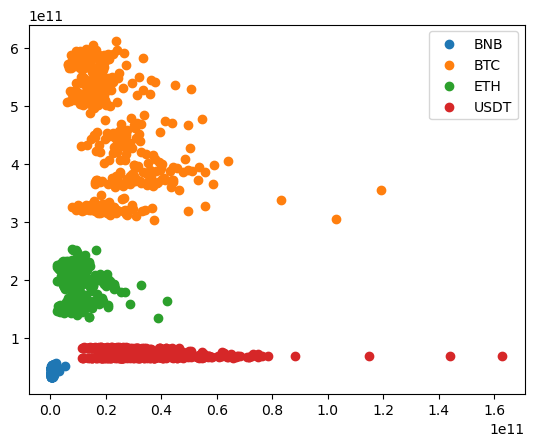

In [49]:
grouped = df.groupby('symbol')
dfs = {key: group for key, group in grouped}

for key, value in dfs.items():
    plt.scatter(value['volume'].to_numpy(), value['market_cap'].to_numpy(), label=f'{key}')

plt.legend()
plt.show()    

/home/alireza/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


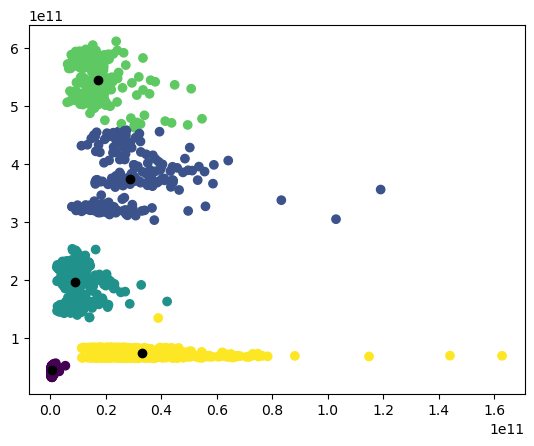

In [50]:
from sklearn.cluster import KMeans

k_means_df = df[['volume', 'market_cap']]
kmeans = KMeans(n_clusters = 5)
kmeans.fit(k_means_df)
plt.scatter(k_means_df['volume'], k_means_df['market_cap'], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'Black')

plt.show()



/home/alireza/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alireza/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alireza/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alireza/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

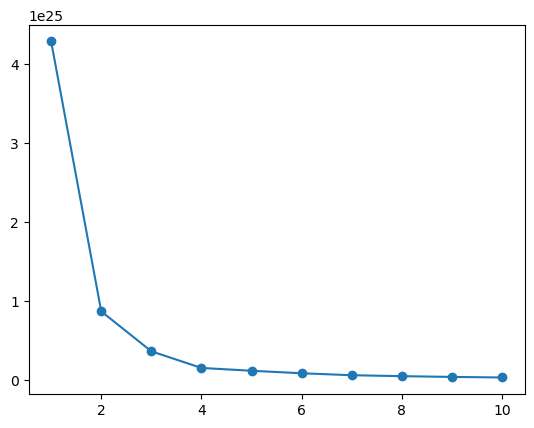

In [51]:
inter_vals = list()
for number_of_clusters in range(1, 11):
    kmeans = KMeans(n_clusters = number_of_clusters)
    kmeans.fit(k_means_df)
    inter_vals.append(kmeans.inertia_)

plt.plot(range(1, 11), inter_vals, marker='o')
plt.show()


Elbow is about 3 or 4 I guess!


In [52]:
from sklearn.cluster import DBSCAN

In [64]:
dbscan_df = df[['volume', 'market_cap']]

dbscan_df.shape

(1456, 2)

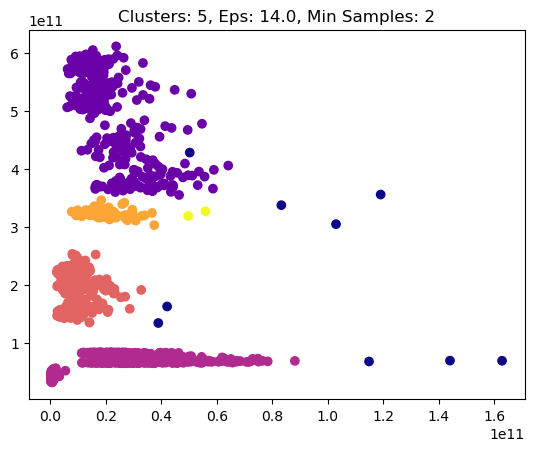

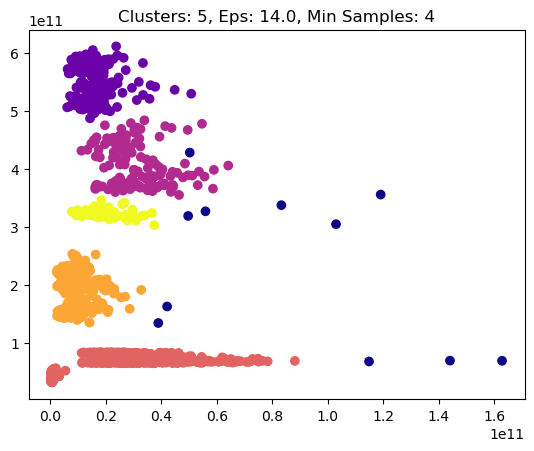

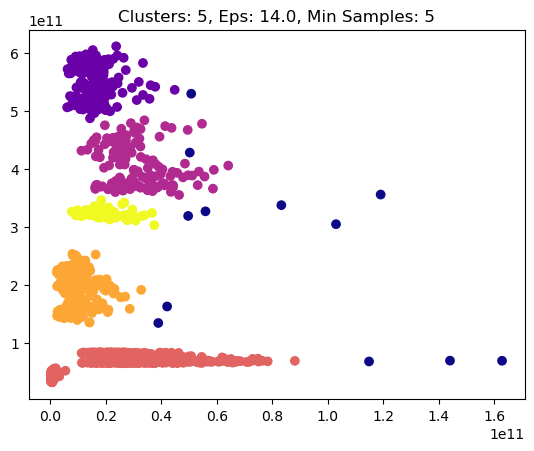

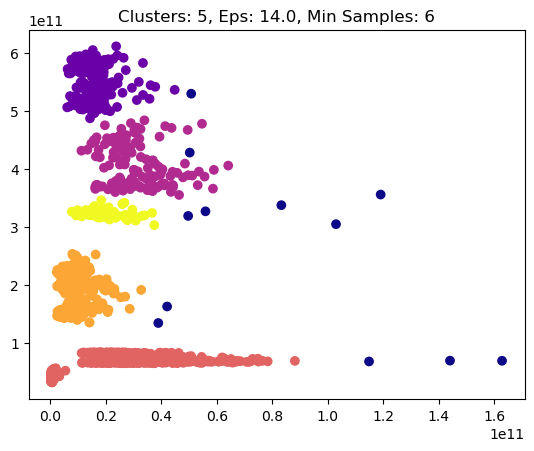

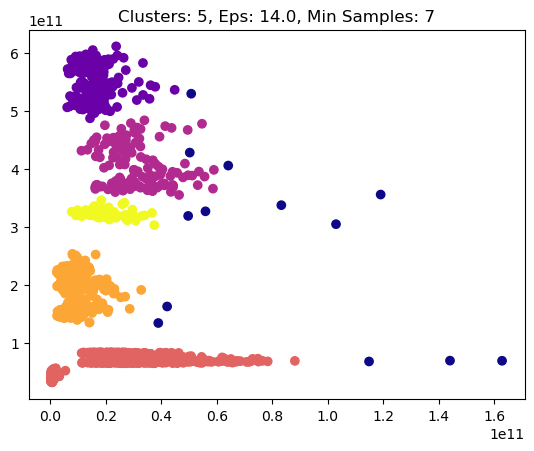

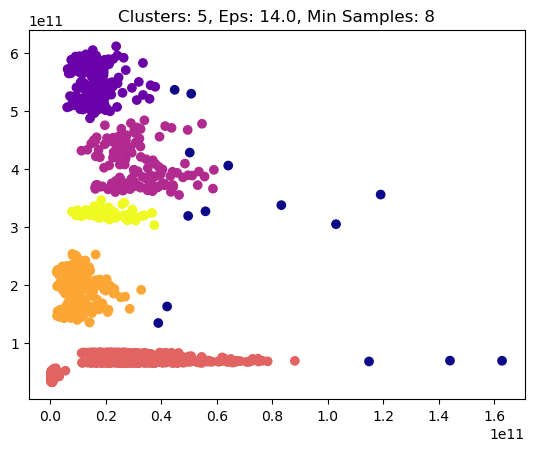

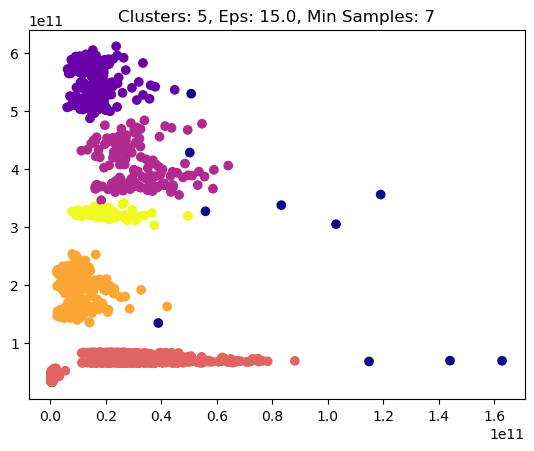

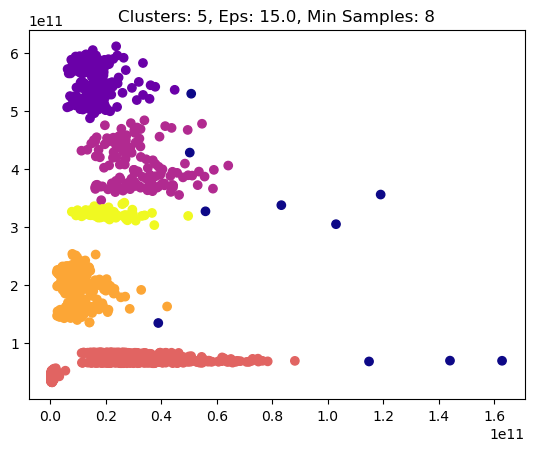

In [74]:
import math

epsilons = [x * 1e9 for x in range(10, 16)]
min_samples = [2, 3, 4, 5, 6, 7, 8]

for eps in epsilons:
    for min_sample in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(dbscan_df)
        labels = dbscan.labels_
        cluster_number = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        outliers = list(labels).count(-1)
        if (5 <= cluster_number and cluster_number <= 5 and outliers < len(dbscan_df) / 10):
            # print(f"Clusters: {cluster_number}, Eps: {eps/1e9}, Min Samples: {min_sample}")
            plt.scatter(dbscan_df['volume'], dbscan_df['market_cap'], c = dbscan.labels_, label=f'{math.log10(eps)}, {min_sample}', cmap='plasma')
            plt.title(f"Clusters: {cluster_number}, Eps: {eps/1e9}, Min Samples: {min_sample}")
            plt.show()
